# Dataset Description

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality issues, the input features have been transformed using PCA.

The only non-transformed features are `Time` and `Amount`.

**Feature Information:**
- Features V1, V2, ... V28 are the principal components obtained with PCA. However, we may guess that these features might be originally credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.
- Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset
- Feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
- Feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise

# Data Strategy
- Dataset Overview
- Exploratory Data Analysis with `Time` and `Amount`
- Data Correlation
- Feature Engineering with `Time`
- Data Scaling
- Model Building with different sampling methods
    - Logistic Regression with imbalanced dataset
    - Logistic Regression with Random Undersampling
    - Logistic Regression with Random Oversampling
    - Logistic Regression with SMOTE
    - Logistic Regression with ADASYN
- PCA Transformation
- Model Building with Random undersampling
    - Logistic Regression
    - Support Vector Classifier
    - Random Forest
    - XGBoost
- Model Comparison

# Loading Packages

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
import datetime
import math
import matplotlib
import sklearn
from IPython.display import HTML
from IPython.display import YouTubeVideo

import pickle
import os

# Plotting modules
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

# Dataset Overview

In [7]:
# Loading dataset
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [9]:
# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [10]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [11]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Insights:**
- 284807 transactions and 31 features
- No missing data
- All data types are float64, except 1: Class

## Target Distribution

In [12]:
# Number of Fraud and Genuine Cases
print(df['Class'].value_counts())
print('\n')
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64


0    0.998273
1    0.001727
Name: Class, dtype: float64


**Insights:**
- There are only 492 fraud cases out of 284,315 transactions which makes 0.0017% of the dataset
- Imbalanced classes can lead the algorithms to overfit since it will assume that most of the transactions are not fraud

In [14]:
# Dataset Description
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [15]:
# Checking only the Time and Amount colums
df[['Time','Amount']].describe()

Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000

**Insights:**
- By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly positively skewed

## Transaction Amount EDA

/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/858029154.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], bins=100)


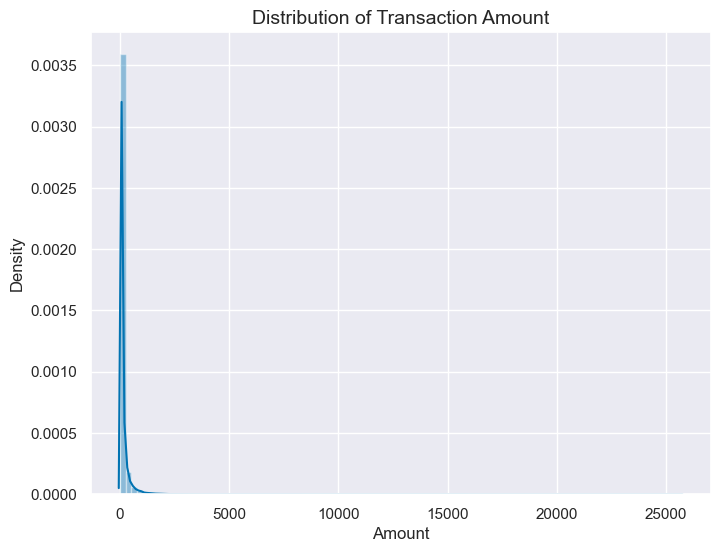

In [16]:
# Checking the distribution graph for Amount feature to confirm the positive skewness
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['Amount'], bins=100)
plt.show()

**Insights:**
- Most of the transaction amount falls between 0 and about 3000
- There are few outliers for higher amount transactions (which could be fraud cases)

/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/2893994985.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/2893994985.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

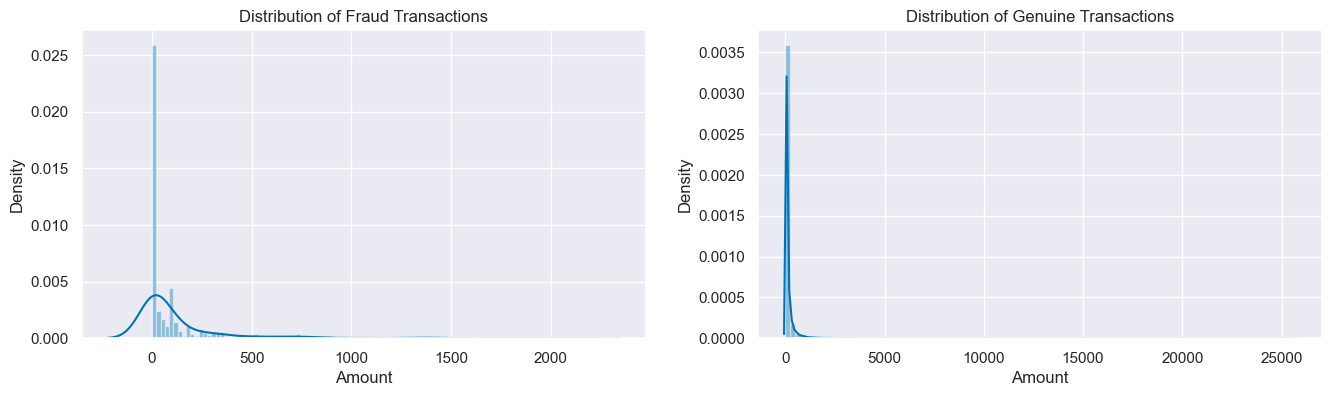

In [17]:
# Checking the Amount feature Distribution Class-wise
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

**Insights**:
- Most of the fraud transaction amount is less than 500 dollars
- Fraud transaction is very high for an amount near to 0

In [18]:
# Checking the Top 5 Amount values for fraud cases
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())


Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


**Insights**:
- There are 113 fraud transactions for just 1 dollar and 27 fraud transaction for 99.99 dollars
- Highest fraud transaction amount was 2125.87 and lowest was just 0.00
- There are 27 fraud transaction for zero amount.

*Explanation for 3rd Insight:*
- Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer
- Instead, an amount of zero is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not
- After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments

Reference : https://docs.multisafepay.com/tools/zero-authorization/what-is-zero-authorization/

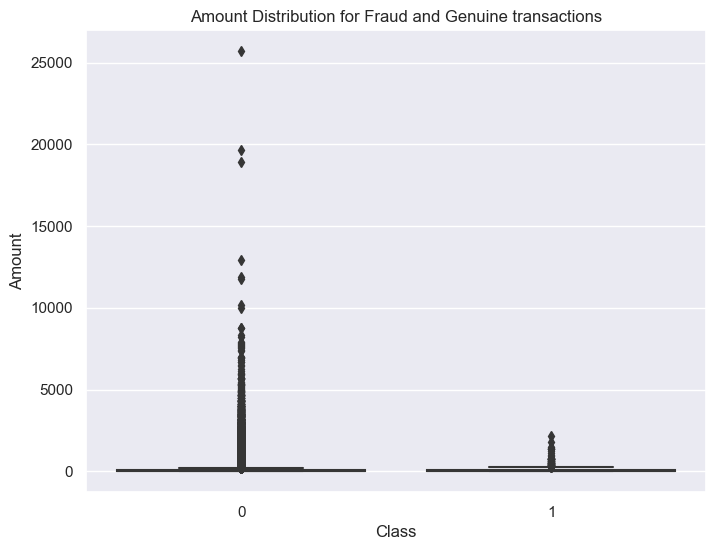

In [20]:
# Distribution of Amount wrt Class
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

**Insight:**:
- Most the fraud transaction amount falls between 0 and about 3000
- There are some outliers for higher amounts in case of genuine transactions and it makes sense to drop these outliers if there are just few data points that are very extreme

## Time Feature EDA

/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/807130265.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=100)


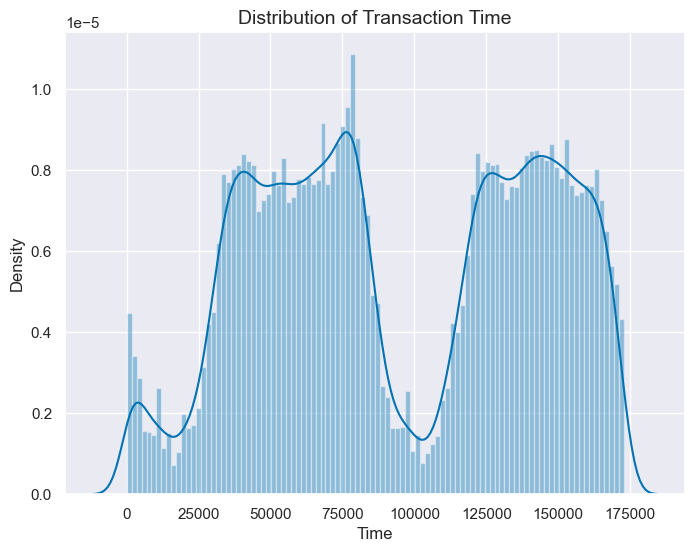

In [21]:
# Distribution of Time
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

**Insights:**
- There are two peaks in the graph and few local peaks.
- The peaks can be day time when most people do the transactions and the depth is the night time when most people sleep
- Dataset contains credit card transactions for two days, so there are two peaks for day time and one depth for one night time

/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/4128130170.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/4128130170.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

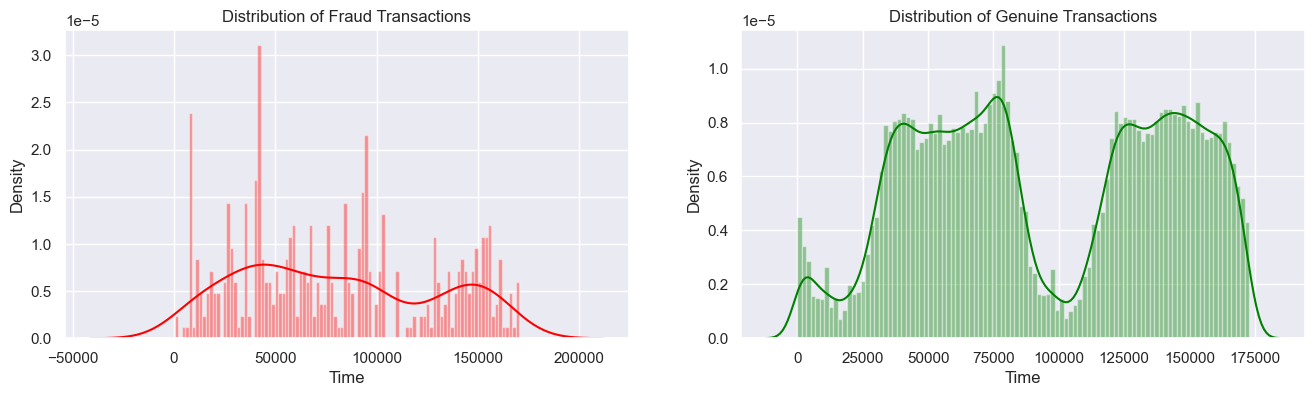

In [22]:
# Distribution of time w.r.t. transactions types
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()


## Correlation Among Explanatory Variables

In [23]:
df[['Time','Amount','Class']].corr()['Class'].sort_values(ascending=False).head(10)

Class     1.000000
Amount    0.005632
Time     -0.012323
Name: Class, dtype: float64

In [24]:
df.corr()

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

# Feature Engineering

## Feature Engineering on Time

In [25]:
# Converting time from second to hour
df['Time'] = df['Time'].apply(lambda sec : (sec/3600))

In [26]:
# Calculating hour of the day
df['hour'] = df['Time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

In [27]:
# Calculating First and Second day
df['day'] = df['Time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [28]:
df[['Time','hour','day','Amount','Class']]

Time  hour  day  Amount  Class
0        0.000000     0    1  149.62      0
1        0.000000     0    1    2.69      0
2        0.000278     0    1  378.66      0
3        0.000278     0    1  123.50      0
4        0.000556     0    1   69.99      0
...           ...   ...  ...     ...    ...
284802  47.996111    23    2    0.77      0
284803  47.996389    23    2   24.79      0
284804  47.996667    23    2   67.88      0
284805  47.996667    23    2   10.00      0
284806  47.997778    23    2  217.00      0

[284807 rows x 5 columns]

In [29]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['Class'] == 1)]['day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['Class'] == 0)]['day'].value_counts()

# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    144787
2    140020
Name: day, dtype: int64


No of fraud transaction Day wise:
1    281
2    211
Name: day, dtype: int64


No of genuine transactions Day wise:
1    144506
2    139809
Name: day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: day, dtype: float64


**Insights:**
- Total number of transaction on Day 1 was 144787, out of which 281 were fraud and 144506 were genuine. Fraud transaction was 0.19% of the total transaction on day 1
- Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2

KeyError: 0

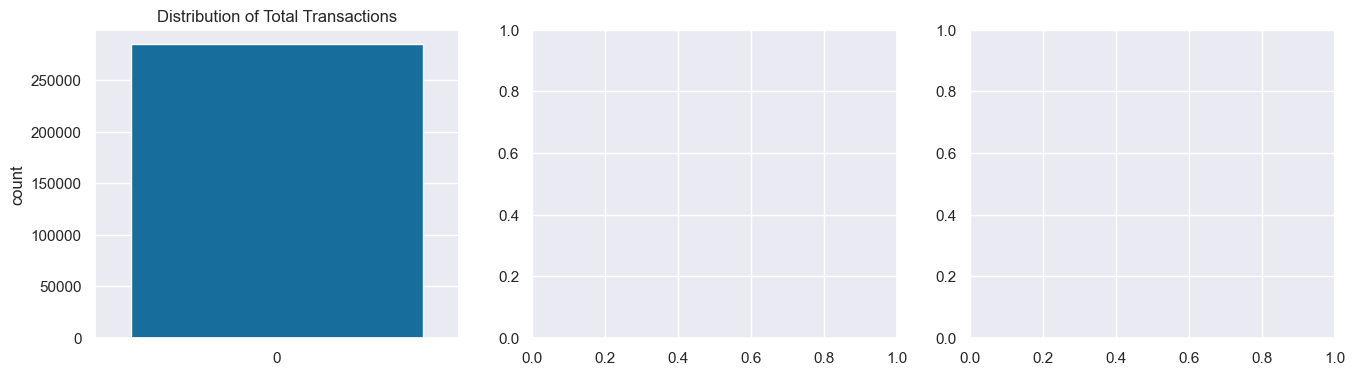

In [30]:
# Plotting the fraud and genuine transactions day-wise
fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.countplot(df['day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['Class'] == 1)]['day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['Class'] == 0)]['day'], ax=axs[2])
axs[2].set_title("Distribution of Genuine Transactions")

plt.show()

/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/554744577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 0]["hour"], color='green') # Genuine - green
/var/folders/nq/ffvfrmg92m10vwygn3rxddv40000gq/T/ipykernel_9530/554744577.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

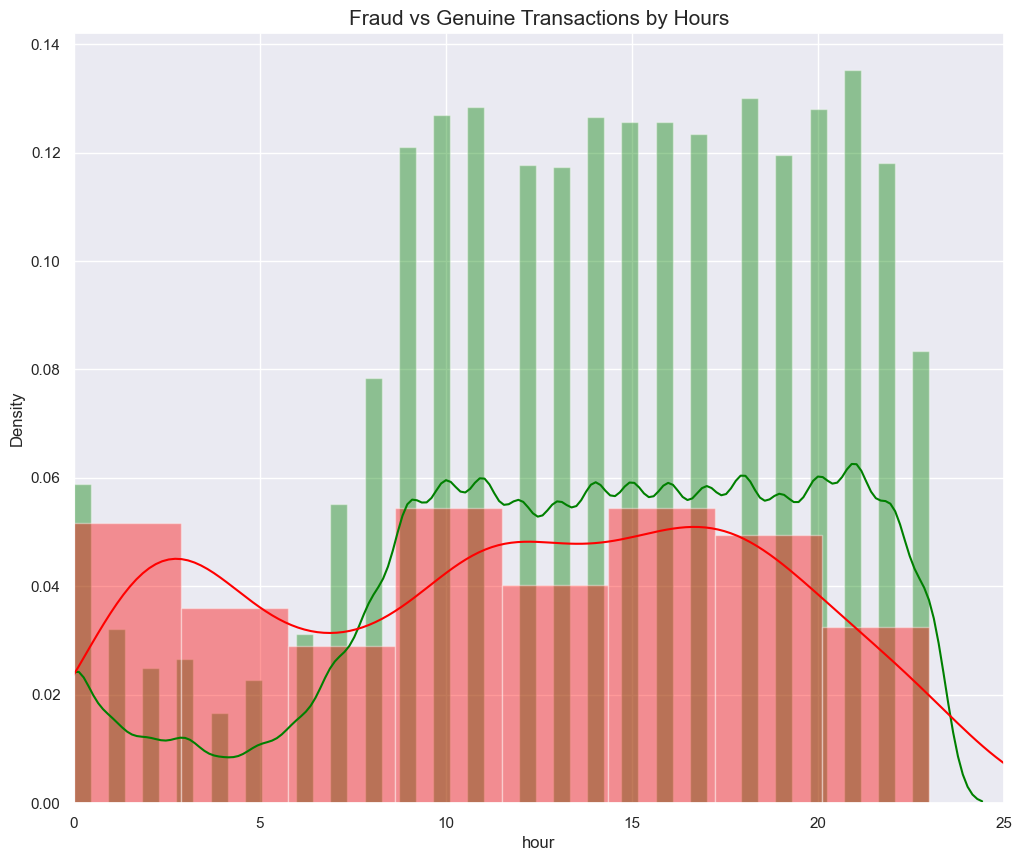

In [31]:
# Checking for patterns between time in hours and Fraud vs Genuine Transactions
plt.figure(figsize=(12,10))

sns.distplot(df[df['Class'] == 0]["hour"], color='green') # Genuine - green
sns.distplot(df[df['Class'] == 1]["hour"], color='red') # Fraudulent - Red

plt.title('Fraud vs Genuine Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show()

**Insights:**
- Most of the fraud transactions are happening at night (0-7 hr)
- Most of the genuine transactions are happening during daytime (9-21 hr)

## Scaling the Data

In [32]:
from sklearn.preprocessing import RobustScaler
# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [33]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()


scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8        V9       V10       V11  \
0 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600   
1  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727   
2 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501   
3 -0.010309  1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487   
4 -0.407193  0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843   

        V12       V13       V14       V15       V16       V17       V18  \
0 -0.617801 -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791   
1  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361   
2  0.066084  0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359   
3  0.178228  0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775   
4  0.538196  1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195   

        V19       V20       V21       V22       V23       V24       V25  \
0  0.403993  0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539   
1 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2 -2.261857  0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3 -1.232622 -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4  0.803487  0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  hour  day  
0 -0.189115  0.133558 -0.021053      0     0    1  
1  0.125895 -0.008983  0.014724      0     0    1  
2 -0.139097 -0.055353 -0.059752      0     0    1  
3 -0.221929  0.062723  0.061458      0     0    1  
4  0.502292  0.219422  0.215153      0     0    1

## Splitting the data

In [34]:
X = df.drop('Class', axis=1)
y = df['Class']

In [35]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [36]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 32)
y_train -  (199364,)
X_test -  (85443, 32)
y_test -  (85443,)


# Building Predictive Models

## Logistic Regression with imbalanced data

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = logreg.predict(X_test)

### Model Evaluation

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.89      0.61      0.72       144

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99922
AUC : 0.80549
Precision : 0.88889
Recall : 0.61111
F1 : 0.72428




In [42]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    85344
1       99
dtype: int64

In [43]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

0    85299
1      144
Name: Class, dtype: int64

**Insight**:
There are originally 144 fraud transactions and 85299 genuine transactions in the test dataset. However, our model predicted only 99 fraud transaction. Also, these 99 predicted fraud transaction may not be identified correctly. It means that these predicted 99 fraud transactions are NOT only from 144 originally fraud transaction, but they may also be from genuine transactions as well.

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85288,    11],
       [   56,    88]])

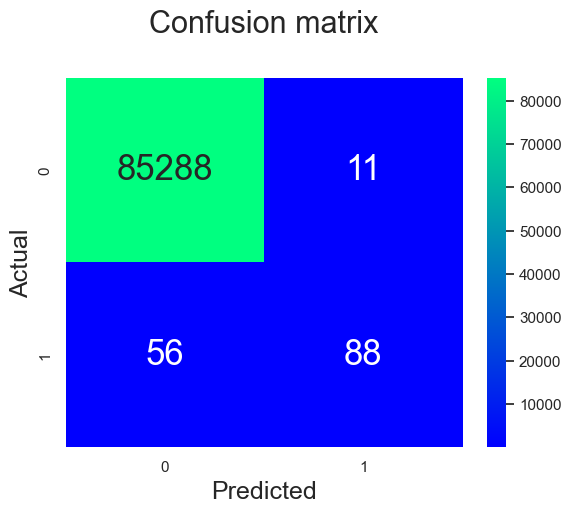

In [45]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

plt.show()

We already know that we have 144 fraud transaction in our test dataset, but our model predicted only 88 fraud transaction.

In [46]:
# Real accuracy of our model
88/144

0.6111111111111112

So, 61.11% is the real accuracy of our model, which is nothing but the Recall Score. So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

AUC -  0.8054910764878057 



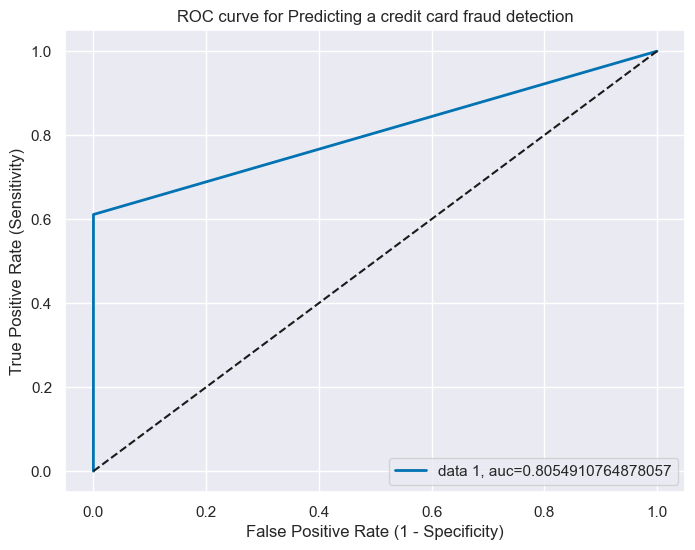

In [47]:
# Plotting ROC curve - depicts if a model can clearly identify a class or not
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Logistic Regression with Random Undersampling

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))


Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 348, 1: 348})


In [51]:
# Undersampling with Logistic Regression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [52]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))

Accuracy :0.97531
AUC : 0.93910
Precision : 0.05840
Recall : 0.90278
F1 : 0.10970


AUC -  0.939102695615814 



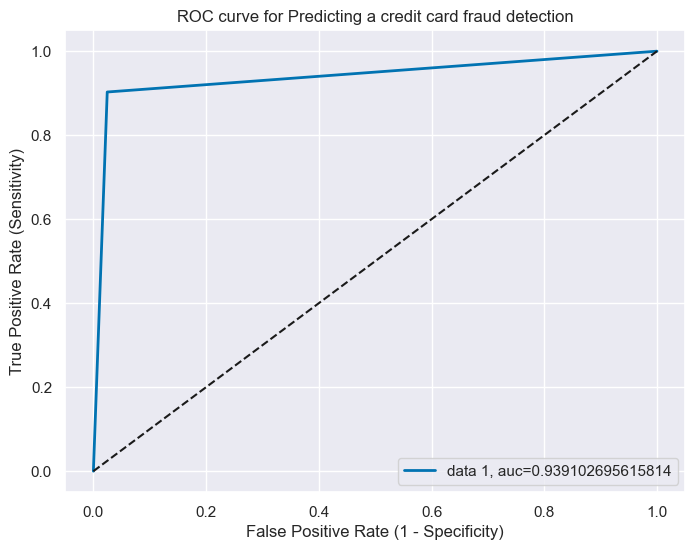

In [53]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

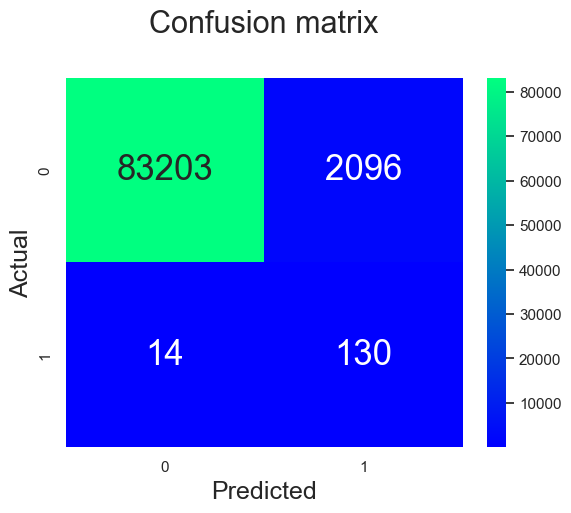

In [54]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

## Logisitic Regression with Random Oversampling

In [55]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


In [56]:
# Oversampling with Logistic Regression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [57]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))

Accuracy :0.97623
AUC : 0.93957
Precision : 0.06055
Recall : 0.90278
F1 : 0.11349


AUC -  0.9395657725569271 



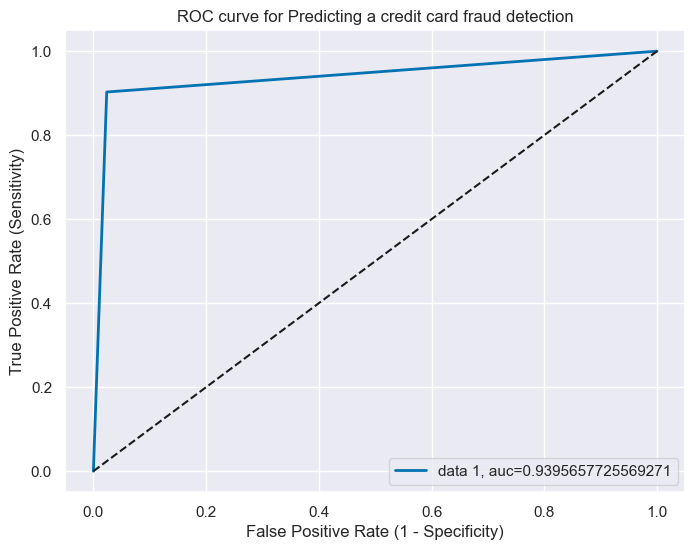

In [58]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Logistic Regression with SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import DistanceMetric
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({0: 199016, 1: 199016})


In [60]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [61]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.98738
AUC : 0.93822
Precision : 0.10756
Recall : 0.88889
F1 : 0.19190


AUC -  0.9382192835398617 



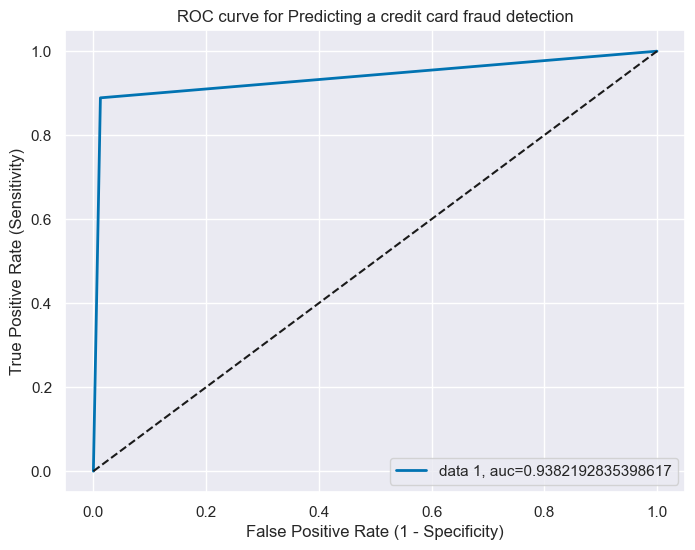

In [62]:
# Plotting ROC curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

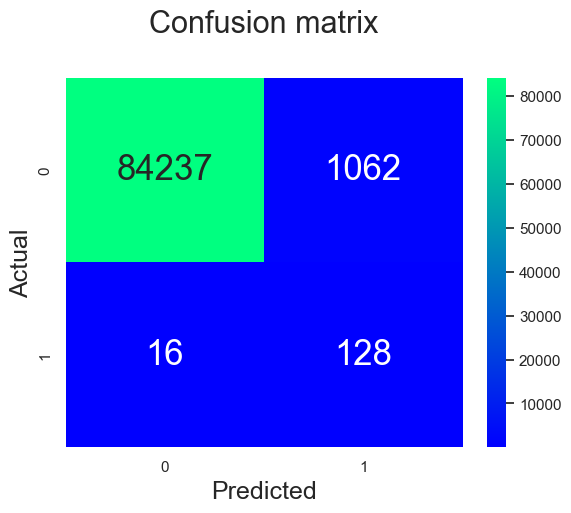

In [63]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

## Logistic Regression with ADASYN data

In [65]:
from imblearn.over_sampling import ADASYN

print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 199016, 1: 348})
Resampled dataset shape Counter({1: 199030, 0: 199016})


In [66]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [67]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :0.96255
AUC : 0.92933
Precision : 0.03910
Recall : 0.89583
F1 : 0.07493


AUC -  0.9293349716878276 



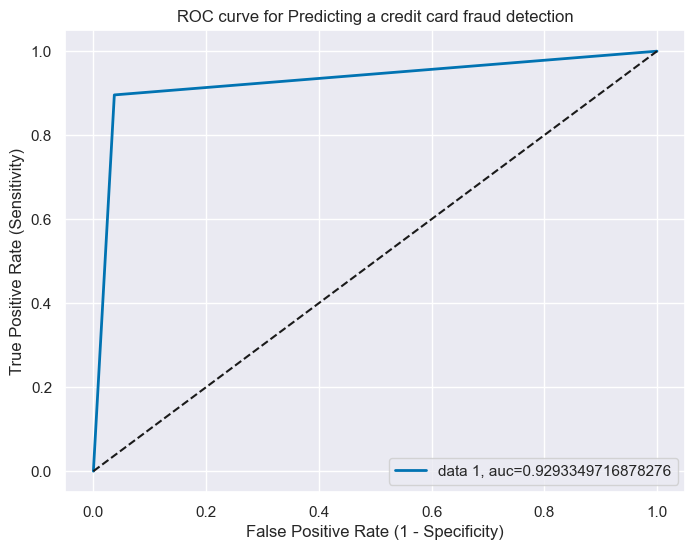

In [68]:
# Plotting ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

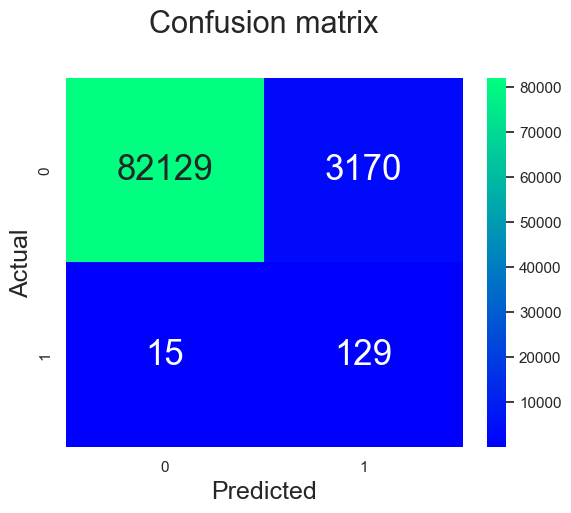

In [69]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

## Checking the Correlation Matrix

<AxesSubplot: >

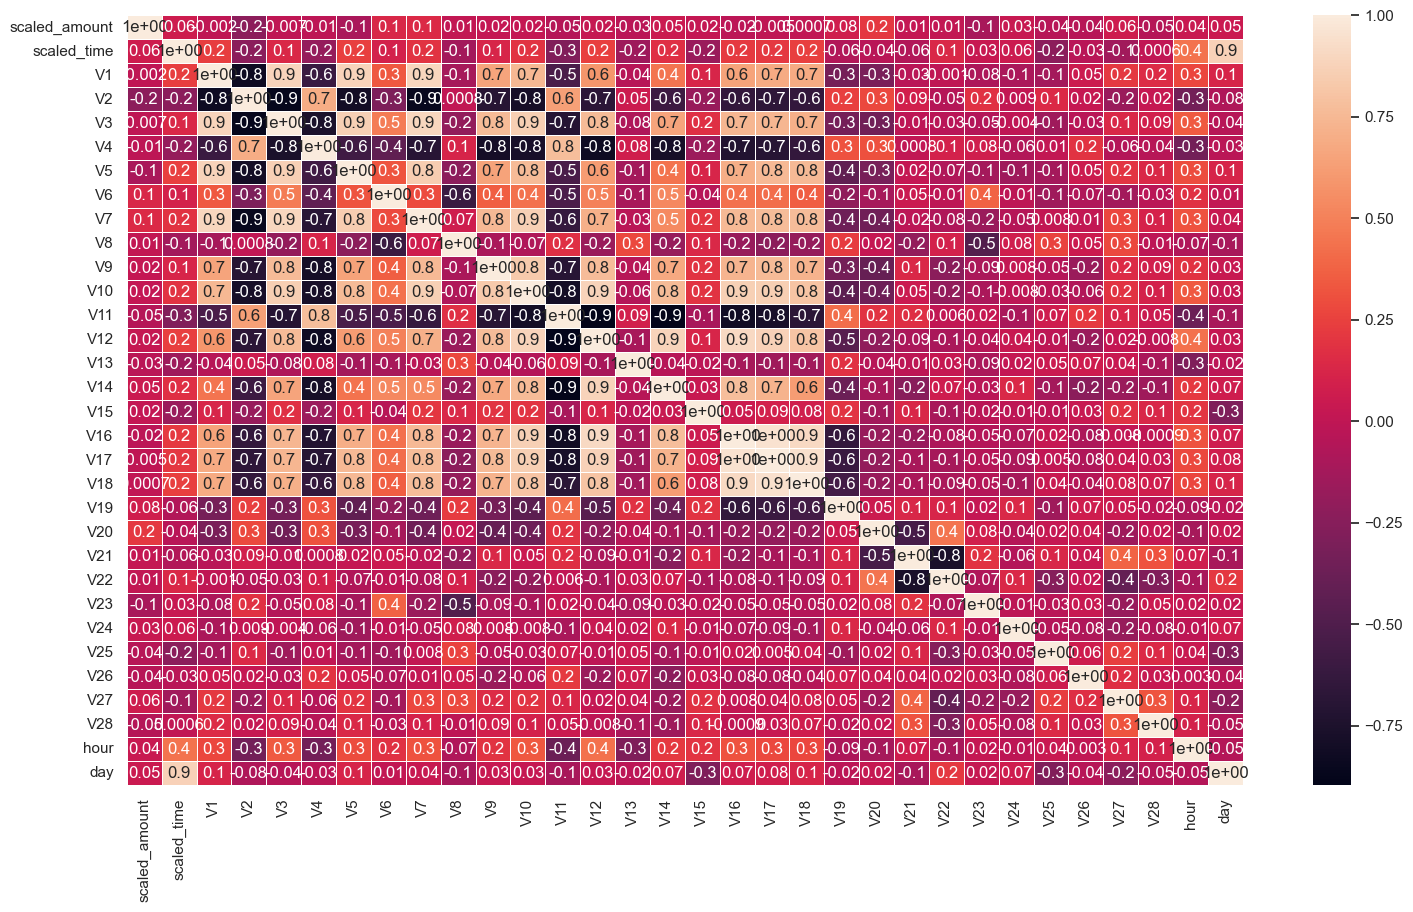

In [71]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(X_train_rus.corr(), annot = True, fmt = '.1',ax = ax, linewidths=.5)

**Insights:**
- Some of the input variables are highly positively and negatively correlated with each other. This suggests multicollinearity in the dataset

## PCA Transformation

### Choosing number of PCA Components

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

# Plotting explained variance vs number of components to find the ideal number of components
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'No of components', 'y':'Cumulative Explained Variance'})

#fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=30, y0=0.95, y1=0.95)

fig.show()

**Insight:**
- Components 13-15 are almost half the components and are able to explain around 90% variance of the data

In [75]:
# PCA Transformation of the X features

X_reduced_pca = PCA(n_components=13, random_state=42).fit_transform(X.values)

In [76]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced_pca, y, test_size=0.30, shuffle=True, random_state=101)

In [77]:
rus = RandomUnderSampler(random_state=42)
X_train_rus_reduced, y_train_rus = rus.fit_resample(X_train_reduced, y_train)
#smote = SMOTE(random_state=42)
#X_train_smote_reduced, y_train_smote_reduced = smote.fit_resample(X_train_reduced, y_train)

## Logistic Regression with Random Undersampling

In [78]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV

log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'],
                  'C':  [0.01, 0.1, 1, 10, 100],
                  "max_iter" : [10000]},

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_rus_reduced, y_train_rus)

# Logistic Regression best estimator
print("Logistic Regression best estimator : \n",grid_log_reg.best_estimator_)

# predict test dataset
y_pred_lr = grid_log_reg.predict(X_test_reduced)

# f1 score
print('\nLogistic Regression f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr)))

Logistic Regression best estimator : 
 LogisticRegression(C=0.1, max_iter=10000, solver='saga')

Logistic Regression f1 Score : 0.10681


## SVC with Random Undersampling

In [79]:
# SMOTE Sampling with SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Grid parameters
svc_params = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001],
              'kernel': ['rbf','linear']}

# Grid Search
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_rus_reduced, y_train_rus)

# SVC best estimator
print("SVC best estimator : \n",grid_svc.best_estimator_)

# predict test dataset
y_pred_svc = grid_svc.predict(X_test_reduced)

# f1 score
print('\nSVC f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_svc)))


SVC best estimator : 
 SVC(C=100, gamma=0.001)

SVC f1 Score : 0.10313


## Random Forest with Random Undersampling

In [80]:
# SMOTE Sampling with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
grid_rf.fit(X_train_rus_reduced, y_train_rus)
#rf.fit(X_train_smote, y_train_smote)

# RF best estimator
print("RF best estimator : \n",grid_rf.best_estimator_)

y_pred_rf = grid_rf.predict(X_test_reduced)

# f1 score
print('\nRF f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf)))

/Users/asreehari/Documents/Workspace/venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/asreehari/Documents/Workspace/venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/asreehari/Documents/Workspace/venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features

RF best estimator : 
 RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=500,
                       random_state=42)

RF f1 Score : 0.14080


## XGBoost with Random Undersampling

In [86]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid)
grid_xgb.fit(X_train_rus_reduced, y_train_rus)

# XGB best estimator
print("XGB best estimator : \n",grid_rf.best_estimator_)

y_pred_rf = grid_rf.predict(X_test_reduced)

# f1 score
print('\nXGB f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf)))

XGB best estimator : 
 RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=500,
                       random_state=42)

XGB f1 Score : 0.14080
XGB best estimator : 
 RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=500,
                       random_state=42)

XGB f1 Score : 0.14080


Text(0.5, 1.0, 'Model Comparison')

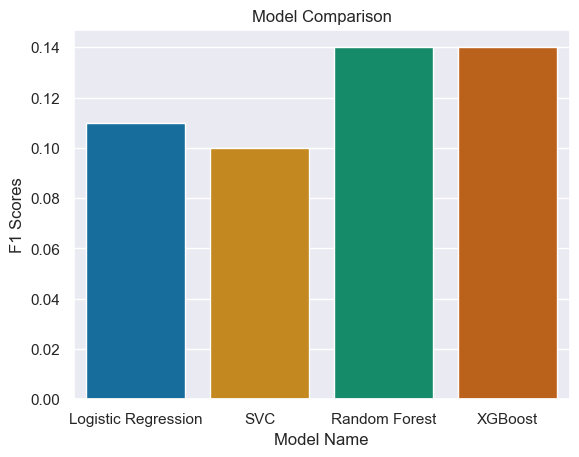

Text(0.5, 1.0, 'Model Comparison')

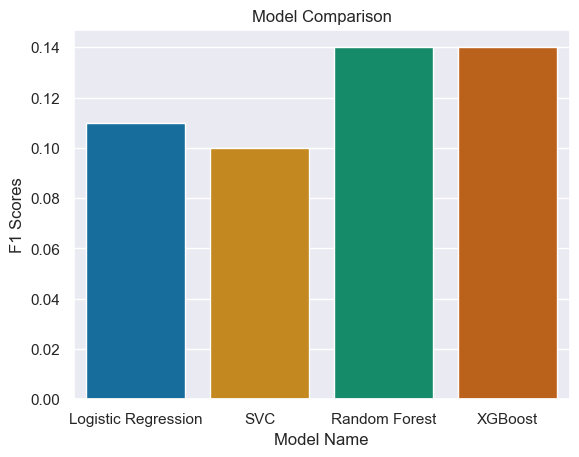

In [87]:
# Comparing F1 scores
f1_dict = {'Logistic Regression': round(metrics.f1_score(y_test , y_pred_lr),2), 'SVC': round(metrics.f1_score(y_test , y_pred_svc),2), 'Random Forest': round(metrics.f1_score(y_test , y_pred_rf),2), 'XGBoost': round(metrics.f1_score(y_test , y_pred_rf),2)}

keys = list(f1_dict.keys())

vals = [f1_dict[k] for k in keys]
sns.barplot(x=keys, y=vals)
plt.xlabel("Model Name")
plt.ylabel("F1 Scores")
plt.title("Model Comparison")

**Insights**:
- Random Forest and XGBoost have the highest F1 Score

In [82]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.0 MB/s eta 0:00:0000:0100:01
